In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential2
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "earlier", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": True,
	"learning_rate": 1e-4,
    "use_cloud_mask": True,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
elif config['mode'] == 'evidential2':
	patchesHandler = PatchesHandlerEvidential2()
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': 
			# exp = 6
			repetition_id = 0
			exp = 8

		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 50; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 53; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 52; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 13; repetition_id = 0		

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 60
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'MT', 'training_date': 'earlier', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': True, 'learning_rate': 0.0001, 'use_cloud_mask': True, 'mask_out_non_biome': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:604 in __init__()- list(self.date_ids): [0]
ic| dataset.py:625 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:189 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:190 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
dates

[2018, 2019]

In [9]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'MT',
 'training_date': 'earlier',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': True,
 'learning_rate': 0.0001,
 'use_cloud_mask': True,
 'mask_out_non_biome': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [10]:
exp

60

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [13]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:702 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:705 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:709 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| dataset.py:713 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| dataset.py:715 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| dataset.py:694 in loadLabel()
    label_per_date.shape: (16795, 10420, 1)


Removing bufer................
Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]


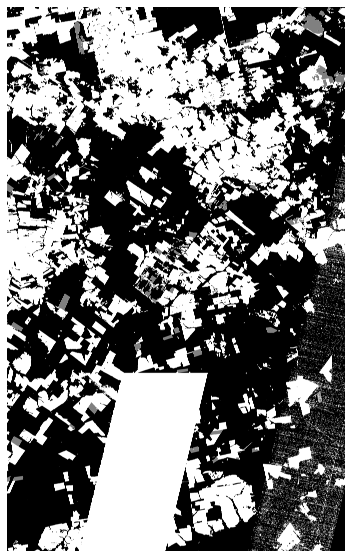

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3359 2084
Mask size:  (16795, 10420)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([2854518,   16879, 4128759], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([1937490,  143216, 4919450], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([2526730,   11210, 4462216], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([3819457,   49013, 3131686], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([4654100,  532812, 1813244], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4398214,  106192, 2495750], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5373478,    7486, 1619192], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([4307477,    8799, 2683880], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([2744350,   85381, 4170425], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([4652154,   58165, 2289837], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([3083197,  137800, 3779159], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), ar

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:645 in loadInputImage()
    image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([114714828,   1054083,   1098901,   1007787,    876898,    648966,
           708581,    287191,    313901,    338545,    240796,   1332783,
         52380640], dtype=int64))

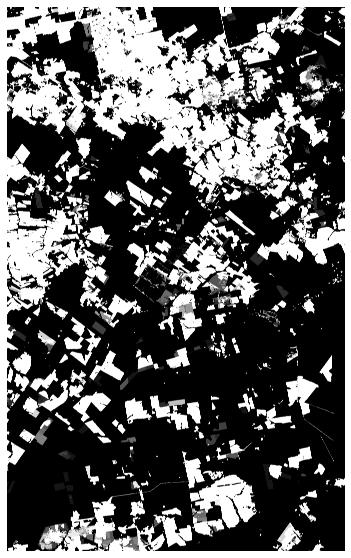

In [22]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

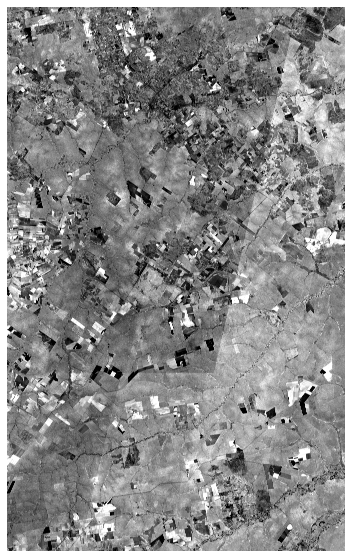

In [23]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([99070749,  1900166, 74032985], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

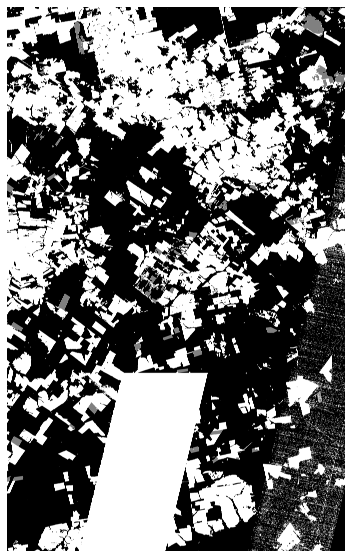

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:150 in getImageChannels()
    self.image_stack.shape: (16795, 10420, 21)
ic| base.py:152 in getImageChannels()- self.channels: 21


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


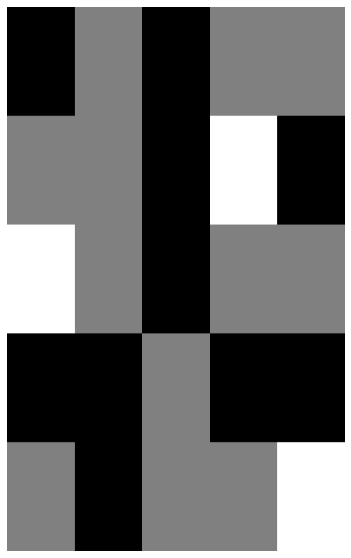

In [29]:
manager.logger.plotFigure(manager.mask_train_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_train_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([49152543,  1136751, 33712578], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([10683495,   223471, 10093502], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([39234711,   539944, 30226905], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([99070749,  1900166, 74032985], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.5851 0.0135 0.4013]
val unique [0.5087 0.0106 0.4806]
test unique [0.5605 0.0077 0.4318]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:28 in create_idx_image()
    im_idx_row.shape: (16795, 10420, 1)
    im_idx_col.shape: (16795, 10420, 1)
ic| patchesHandler.py:29 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:35 in create_idx_image()
    im_idx.shape: (16795, 10420, 2)
    im_idx.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:47 in extract_patches()
    coords.shape: (439, 271, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:51 in extract_patches()
    coords.shape: (118969, 2)
    coords.dtype: dtype('uint16')


In [35]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:168 in trainTestSplit()
    self.coords_train.shape: (54516, 3)
    self.coords_val.shape: (13175, 3)


In [36]:
if config["training"] == True:
    manager.label_mask.shape

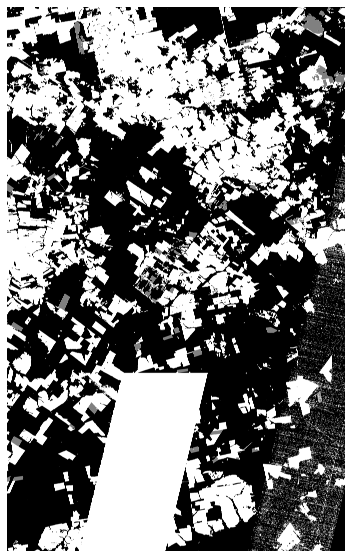

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

[[    0  2090     0]
 [    0  2128     0]
 [    0  2166     0]
 ...
 [16644  8132     0]
 [16644  8170     0]
 [16644  8208     0]]


In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (2962, 3) validation samples:  (623, 3)


In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [46]:
manager.dataset.bands

10

ic

[ 1938 10146     0]
coord [ 1938 10146     0]
image_patch.shape (16795, 10420, 1)
reference_patch.shape (16795, 10420, 21)


| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.0968616
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.20032947


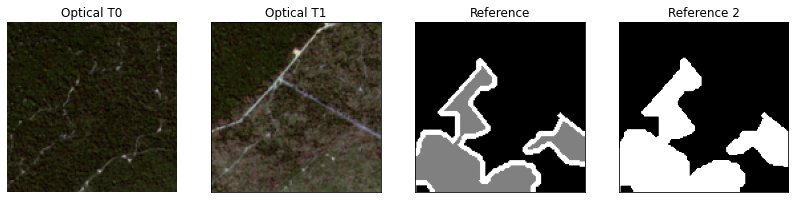

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.20543115
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.7651048


[ 190 9158    0]
coord [ 190 9158    0]
image_patch.shape (16795, 10420, 1)
reference_patch.shape (16795, 10420, 21)


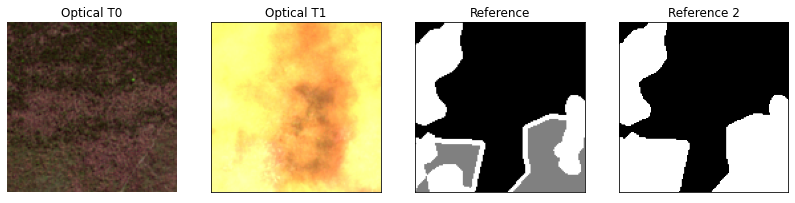

In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.31899545
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.36807907


[ 874 2622    0]
coord [ 874 2622    0]
image_patch.shape (16795, 10420, 1)
reference_patch.shape (16795, 10420, 21)


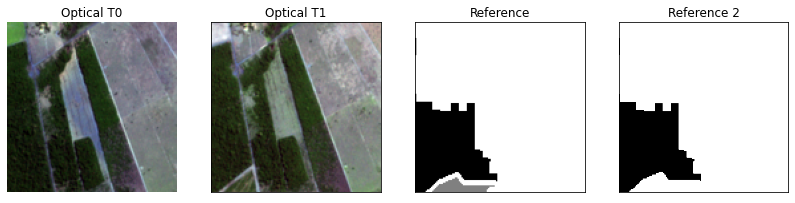

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.30423847
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30743977


[ 684 9272    0]
coord [ 684 9272    0]
image_patch.shape (16795, 10420, 1)
reference_patch.shape (16795, 10420, 21)


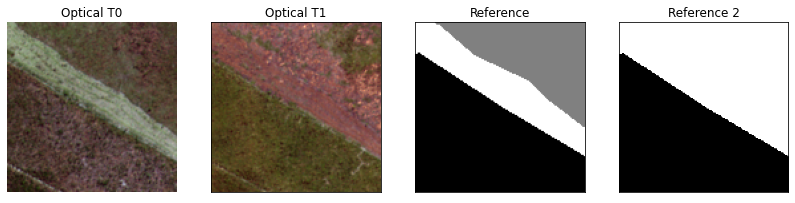

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:42 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.30423847
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30743977


[ 684 9272    0]
coord [ 684 9272    0]
image_patch.shape (16795, 10420, 1)
reference_patch.shape (16795, 10420, 21)


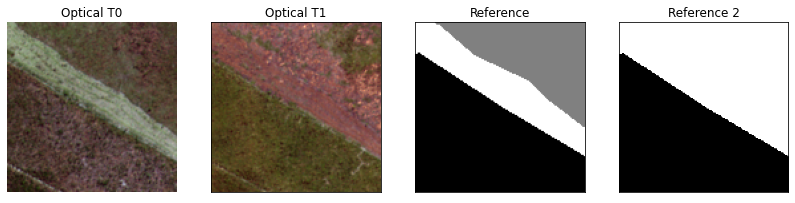

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    manager.getGenerators()


In [53]:
if config["training"] == True:
    manager.fixChannelNumber()

In [54]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/MT/exp60


In [55]:
if config["training"] == True:
    print(manager.channels)

21


In [56]:
if config["training"] == True:
    print(manager.image_stack.shape)

(16795, 10420, 21)


In [57]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [58]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


277/277 [==============================] - 24s 88ms/step - loss: 0.0681 - accuracy: 0.6735 - val_loss: 0.0365 - val_accuracy: 0.6765

Epoch 00001: val_loss improved from 0.06698 to 0.03648, saving model to D:/Jorge/datasets/deforestation/experiments/MT/exp60/models\resunet_0.h5
New best val loss. Val loss: 0.03648. Early stop count: 0
Epoch: 3
Anneling Coeficient [0.2]
277/277 [==============================] - 25s 89ms/step - loss: 0.0513 - accuracy: 0.6875 - val_loss: 0.0382 - val_accuracy: 0.6732

Epoch 00001: val_loss did not improve from 0.03648
Early stop count: 1
Epoch: 4
Anneling Coeficient [0.3]
277/277 [==============================] - 24s 88ms/step - loss: 0.0460 - accuracy: 0.6927 - val_loss: 0.0356 - val_accuracy: 0.6751

Epoch 00001: val_loss improved from 0.03648 to 0.03555, saving model to D:/Jorge/datasets/deforestation/experiments/MT/exp60/models\resunet_0.h5
New best val loss. Val loss: 0.03555. Early stop count: 0
Epoch: 5
Anneling Coeficient [0.4]
277/277 [=======

In [59]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [60]:
repetition_id = 0

In [61]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [62]:
manager.image_stack.shape

(16795, 10420, 21)

In [63]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [64]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [65]:
manager.image_stack.shape

(16795, 10420, 21)

In [66]:
manager.setPadding()

-5.0 -12.0


In [67]:
manager.infer()

ic| multioutput.py:171 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/MT/exp60/models/resunet_0.h5'


Dropout training mode: False
time:  0
alpha.shape (16800, 10432, 2)
S.shape (16800, 10432)
K 2
u.shape (16800, 10432)
belief.shape (16800, 10432, 2)
Inference runtime 73.1


In [68]:
manager.prob_rec.shape

(16800, 10432, 2)

In [69]:
manager.loadPredictedProbabilities()

In [70]:
manager.prob_rec.shape

(16800, 10432, 2)

In [71]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [72]:
manager.prob_rec.shape

(16800, 10432, 2)

In [73]:
manager.getMeanProb()

In [74]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.31252617
    np.max(value): 0.9933067


In [75]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (16800, 10432, 

2)


(16800, 10432, 2)

In [76]:
manager.unpadMeanProb()

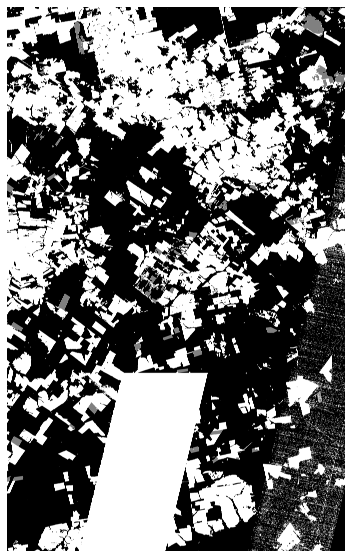

In [77]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [78]:
manager.squeezeLabel()

In [79]:
manager.mean_prob.shape

(16795, 10420, 2)

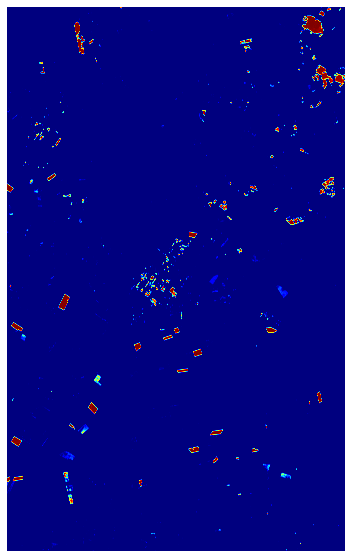

In [80]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [81]:
print(manager.label_mask.shape)

(16795, 10420)


In [82]:
# manager.getLabelTest()

In [83]:
# manager.getMAP()

In [84]:
manager.prob_rec.shape

(16800, 10432, 2)

In [85]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [86]:
manager.prob_rec.shape

(16800, 10432, 2)

In [87]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.31252617
    np.max(value): 0.9933067


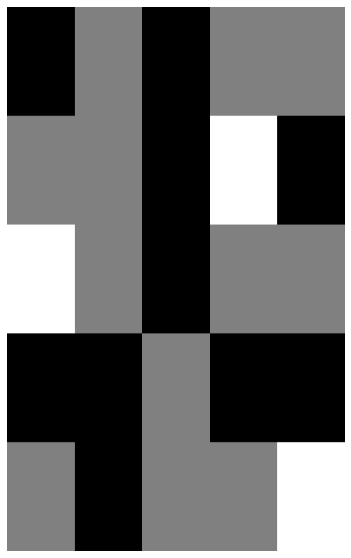

In [88]:
manager.logger.plotFigure(manager.mask_train_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [89]:
manager.getLabelCurrentDeforestation()

In [90]:
manager.classes_mode

True

In [91]:
manager.applyProbabilityThreshold()

(16795, 10420, 2)


In [92]:
manager.setMeanProbNotConsideredAreas()


In [93]:
manager.getTestValues()

ic| base.py:488 in getTestValues()- predicted_test.shape: (70001560,)
ic| base.py:497 in getTestValues()- predicted_test.shape: (39774655,)


In [94]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([172838756,   2165144], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([172978098,   2025802], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([174864558,    139342], dtype=int64))


In [95]:
manager.calculateMetrics()

ic| base.py:541 in calculateMetrics()
    self.f1: 78.12
    self.precision: 71.41
    self.recall: 86.23


In [96]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:249 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (21000468,)
ic| multioutput.py:255 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (10892682,)
ic| base.py:552 in calculateMetricsValidation()
    f1_val: 95.51
    precision_val: 94.59
    recall_val: 96.46
    mAP_val: 96.11


In [97]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [98]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:702 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:705 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:709 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| dataset.py:713 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| dataset.py:715 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| dataset.py:694 in loadLabel()
    label_per_date.shape: (16795, 10420, 1)


In [99]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([174584022,    419878], dtype=int64))


In [100]:
manager.getErrorMaskToShowRGB()

[0 1]


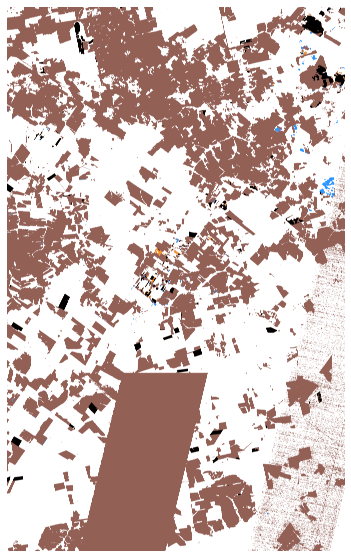

In [101]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [102]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [103]:
manager.setUncertainty()

In [104]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [105]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:123 in getStats()
    np.min(value): 0.0066933
    np.mean(value): 0.37495035
    np.max(value): 1.0


In [106]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:123 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.018868772
    np.max(value): 1.0


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (16795, 10420)


(16795, 10420)

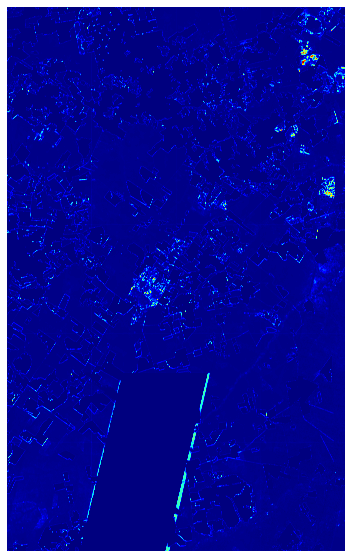

In [107]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



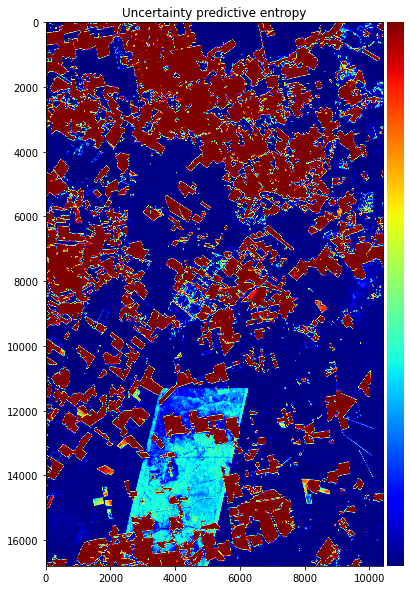

In [108]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [109]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:592 in getTestValues2()
    self.label_mask.shape: (16795, 10420)
ic| base.py:593 in getTestValues2()
    self.mask_test.shape: (16795, 10420)
ic| base.py:597 in getTestValues2()
    self.label_mask_test.shape: (70001560,)
ic| base.py:605 in getTestValues2()
    self.error_mask_test.shape: (39720935,)


In [110]:
import src.plot as _plt
'''
def plotCropSample(self, manager):
    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]

    self.plotCropSampleFlag = True
    if self.plotCropSampleFlag == True:
        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)
        lims = manager.dataset.previewLims1
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = manager.dataset.previewLims2
        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims1, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty1_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        save_name = 'output/figures/{}PredictSampleUncertainty2_exp{}.png'.format(
            manager.dataset.__class__.__name__, str(manager.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], 
                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, 
                lims = manager.dataset.previewLims2, 
                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, True, False, True],
                invertMask = [False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + manager.dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar.png', dpi=150, bbox_inches='tight')
'''

"\ndef plotCropSample(self, manager):\n    uncertainty_vlims = [np.min(manager.uncertainty_to_show), np.max(manager.uncertainty_to_show)]\n\n    self.plotCropSampleFlag = True\n    if self.plotCropSampleFlag == True:\n        ic(manager.dataset.previewLims1, manager.dataset.previewLims2)\n        lims = manager.dataset.previewLims1\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = manager.dataset.previewLims2\n        ic(np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample4(manager.image_stack[...,manager.dataset.previewBandsSnip[-1]], manager.mean_prob[...,1], \n                manager.error_mask_to_show_rgb[...,::-1], manager.uncertainty_to_show, \n                lims = manager.dataset.previewLims1, \n                titles = ['Snippet', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, 'jet', plt.cm.gray, 'jet'],\n             

In [111]:

# import types
# manager.logger.plotCropSample = types.MethodType(plotCropSample, manager.logger)


In [112]:
## manager.logger.plotCropSample(manager)

In [113]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [114]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [115]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

In [116]:
# manager.logger.plotCropSampleT0T1(manager)

In [117]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:123 in getStats()
    np.min(value): 0.00707232
    np.mean(value): 0.031752203
    np.max(value): 1.0


In [118]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [119]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [120]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [121]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [122]:
manager.config['uncertainty_method'] = 'evidential2'

In [123]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(np.min(self.uncertainty)+0.0000001, np.max(self.uncertainty)-0.005, 11))[1:]

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [124]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)


Get precision-recall threshold

In [125]:

manager.getUncertaintyAAValues()

ic| 4112614954.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (39720935,)
    self.label_mask_current_deforestation_test.shape: (39720935,)


[0.10586517818715811, 0.20465793616636277, 0.3034506941455674, 0.4022434521247721, 0.5010362101039767, 0.5998289680831813, 0.698621726062386, 0.7974144840415907, 0.8962072420207953, 0.995]
threshold 0.10586517818715811


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1936533,)
    predicted_test_classified_incorrect.shape: (1936533,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1936533
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1936533
    len(label_mask_current_deforestation_test): 39720935


[0.84229941 0.92208114 0.64452828 0.04875346 0.49225585 0.72342277
 0.08050251]
threshold 0.20465793616636277


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1083739,)
    predicted_test_classified_incorrect.shape: (1083739,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1083739
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1083739
    len(label_mask_current_deforestation_test): 39720935


[0.80051064 0.90744032 0.73495738 0.02728382 0.43988673 0.66986874
 0.0977619 ]
threshold 0.3034506941455674


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (725695,)
    predicted_test_classified_incorrect.shape: (725695,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 725695
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 725695
    len(label_mask_current_deforestation_test): 39720935


[0.78256179 0.90013456 0.77774868 0.01826984 0.39555266 0.62174485
 0.10815871]
threshold 0.4022434521247721


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (487112,)
    predicted_test_classified_incorrect.shape: (487112,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 487112
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 487112
    len(label_mask_current_deforestation_test): 39720935


[0.76940014 0.89434475 0.8039635  0.01226336 0.35858282 0.57709161
 0.11728893]
threshold 0.5010362101039767


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (362171,)
    predicted_test_classified_incorrect.shape: (362171,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 362171
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 362171
    len(label_mask_current_deforestation_test): 39720935


[0.75897668 0.88910251 0.82260897 0.00911789 0.32067196 0.53049963
 0.11389001]
threshold 0.5998289680831813


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (273888,)
    predicted_test_classified_incorrect.shape: (273888,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 273888
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 273888
    len(label_mask_current_deforestation_test): 39720935


[0.74927215 0.88343717 0.8360518  0.00689531 0.28592261 0.48905674
 0.1025392 ]
threshold 0.698621726062386


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (202758,)
    predicted_test_classified_incorrect.shape: (202758,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 202758
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 202758
    len(label_mask_current_deforestation_test): 39720935


[0.73856412 0.87778195 0.84590874 0.00510456 0.26317383 0.45096004
 0.08230191]
threshold 0.7974144840415907


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (142482,)
    predicted_test_classified_incorrect.shape: (142482,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 142482
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 142482
    len(label_mask_current_deforestation_test): 39720935


[0.72834737 0.87281063 0.85346114 0.00358708 0.24653783 0.39796005
 0.05668076]
threshold 0.8962072420207953


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (93086,)
    predicted_test_classified_incorrect.shape: (93086,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 93086
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 93086
    len(label_mask_current_deforestation_test): 39720935


[0.72096178 0.86756936 0.859263   0.0023435  0.19197605 0.31548908
 0.03014597]
threshold 0.995


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (53734,)
    predicted_test_classified_incorrect.shape: (53734,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 53734
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 53734
    len(label_mask_current_deforestation_test): 39720935


[0.71438051 0.8641882  0.86219502 0.00135279 0.13623188 0.03839869
 0.00477994]


In [126]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:733 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (39720935,)
    self.label_mask_current_deforestation_test.shape: (39720935,)


threshold 0.10586517818715811
(39720935,) (39720935,)
cm_audited [[39126203    64040]
 [   28904   501788]]
[0.88682073 0.94553526]
threshold 0.20465793616636277
(39720935,) (39720935,)
cm_audited [[39093045    97198]
 [   39784   490908]]
[0.83472707 0.92503373]
threshold 0.3034506941455674
(39720935,) (39720935,)
cm_audited [[39075560   114683]
 [   45792   484900]]
[0.80872873 0.91371266]
threshold 0.4022434521247721
(39720935,) (39720935,)
cm_audited [[39062368   127875]
 [   50404   480288]]
[0.78973565 0.90502212]
threshold 0.5010362101039767
(39720935,) (39720935,)
cm_audited [[39051610   138633]
 [   54451   476241]]
[0.77453429 0.89739623]
threshold 0.5998289680831813
(39720935,) (39720935,)
cm_audited [[39041773   148470]
 [   58541   472151]]
[0.76077187 0.88968931]
threshold 0.698621726062386
(39720935,) (39720935,)
cm_audited [[39031336   158907]
 [   62505   468187]]
[0.7465978  0.88221982]
threshold 0.7974144840415907
(39720935,) (39720935,)
cm_audited [[39021315   16892

ic| base.py:739 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.88682073, 0.94553526],
                                  [0.83472707, 0.92503373],
                                  [0.80872873, 0.91371266],
                                  [0.78973565, 0.90502212],
                                  [0.77453429, 0.89739623],
                                  [0.76077187, 0.88968931],
                                  [0.7465978 , 0.88221982],
                                  [0.73339141, 0.87563031],
                                  [0.72318551, 0.86883729],
                                  [0.71492529, 0.86450144]])


cm_audited [[39007304   182939]
 [   71908   458784]]
[0.71492529 0.86450144]


In [127]:
manager.setPlotLimsForUncertaintyAA()

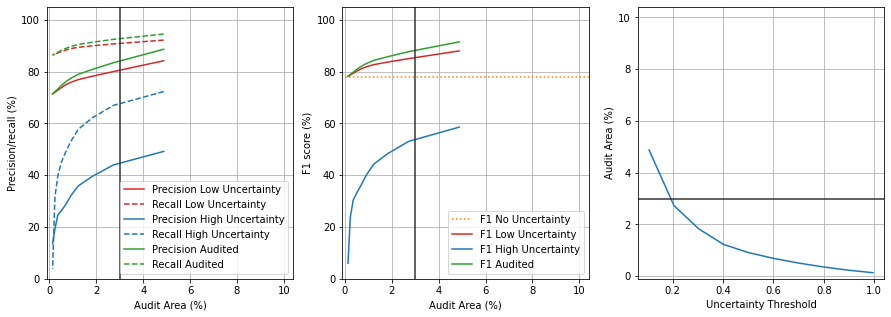

In [128]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [129]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [130]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [131]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, np.max(manager.uncertainty)-0.01))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (0.007072420207953453, 0.99)


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.3825173472088409
threshold 0.3825173472088409


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (531156,)
    predicted_test_classified_incorrect.shape: (531156,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 531156
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 531156
    len(label_mask_current_deforestation_test): 39720935


[0.77174651 0.89544527 0.79940154 0.01337219 0.36617106 0.58626869
 0.11514889]
0.6145550729991125
threshold 0.6145550729991125


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (262437,)
    predicted_test_classified_incorrect.shape: (262437,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 262437
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 262437
    len(label_mask_current_deforestation_test): 39720935


[0.74774155 0.88258498 0.83771001 0.00660702 0.28166915 0.4833043
 0.10009352]
0.23911014599822503
threshold 0.23911014599822503


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (930795,)
    predicted_test_classified_incorrect.shape: (930795,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 930795
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 930795
    len(label_mask_current_deforestation_test): 39720935


[0.79352158 0.9045457  0.75307335 0.02343336 0.42241788 0.65216951
 0.10228514]
0.15047962141856935
threshold 0.15047962141856935


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1439173,)
    predicted_test_classified_incorrect.shape: (1439173,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1439173
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1439173
    len(label_mask_current_deforestation_test): 39720935


[0.81646085 0.91607052 0.69469297 0.0362321  0.46983096 0.6934977
 0.08977161]
0.18819815920120195
threshold 0.18819815920120195


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1173068,)
    predicted_test_classified_incorrect.shape: (1173068,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1173068
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1173068
    len(label_mask_current_deforestation_test): 39720935


[0.80435074 0.9091597  0.72446918 0.02953274 0.44908999 0.67840678
 0.09531717]
0.1941813724207005
threshold 0.1941813724207005


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1139424,)
    predicted_test_classified_incorrect.shape: (1139424,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1139424
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1139424
    len(label_mask_current_deforestation_test): 39720935


[0.80296348 0.9085014  0.72837164 0.02868573 0.44569178 0.6753975
 0.09624523]
0.1806827172347139
threshold 0.1806827172347139


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1218924,)
    predicted_test_classified_incorrect.shape: (1218924,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1218924
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1218924
    len(label_mask_current_deforestation_test): 39720935


[0.80655828 0.91012592 0.71927785 0.03068719 0.45287027 0.68197299
 0.09426058]
0.1855966420691464
threshold 0.1855966420691464


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1188583,)
    predicted_test_classified_incorrect.shape: (1188583,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1188583
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1188583
    len(label_mask_current_deforestation_test): 39720935


[0.80511806 0.90952443 0.72273748 0.02992334 0.45031711 0.67949388
 0.09497589]
0.18484120558250072
threshold 0.18484120558250072


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1193270,)
    predicted_test_classified_incorrect.shape: (1193270,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1193270
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1193270
    len(label_mask_current_deforestation_test): 39720935


[0.80532584 0.90962596 0.72224567 0.03004134 0.4506792  0.67980534
 0.09485387]
0.1844597606265017
threshold 0.1844597606265017


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1195598,)
    predicted_test_classified_incorrect.shape: (1195598,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1195598
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1195598
    len(label_mask_current_deforestation_test): 39720935


[0.80543556 0.90967603 0.72200259 0.03009995 0.45084633 0.67995908
 0.09479634]
0.18508629483059147
threshold 0.18508629483059147


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1191702,)
    predicted_test_classified_incorrect.shape: (1191702,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191702
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191702
    len(label_mask_current_deforestation_test): 39720935


[0.80525776 0.90959346 0.72241526 0.03000186 0.45054872 0.67969086
 0.09489514]
0.18516151098548936
threshold 0.18516151098548936


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1191260,)
    predicted_test_classified_incorrect.shape: (1191260,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191260
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191260
    len(label_mask_current_deforestation_test): 39720935


[0.8052376  0.90957854 0.72245483 0.02999073 0.45052517 0.67968528
 0.09490533]
0.18505295875198474
threshold 0.18505295875198474


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1191922,)
    predicted_test_classified_incorrect.shape: (1191922,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191922
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191922
    len(label_mask_current_deforestation_test): 39720935


[0.80526639 0.90959305 0.72239265 0.0300074  0.45056686 0.67971983
 0.0948868 ]
0.1851196309091982
threshold 0.1851196309091982


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1191496,)
    predicted_test_classified_incorrect.shape: (1191496,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191496
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191496
    len(label_mask_current_deforestation_test): 39720935
ic| 2231348037.py:18 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.18508629483059147


[0.80524791 0.90958892 0.72243222 0.02999668 0.45054058 0.67968314
 0.09490081]


In [132]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.18508629483059147
threshold 0.18508629483059147


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1191702,)
    predicted_test_classified_incorrect.shape: (1191702,)
ic| metrics.py:301 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191702
    len(label_mask_current_deforestation_test): 39720935
ic| metrics.py:303 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1191702
    len(label_mask_current_deforestation_test): 39720935


[0.80525776 0.90959346 0.72241526 0.03000186 0.45054872 0.67969086
 0.09489514]
threshold 0.18508629483059147
(39720935,) (39720935,)


ic| base.py:877 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000186]),
                     'UEO': array([0.09489514]),
                     'f1': 78.12,
                     'f1_H': array([0.54189192]),
                     'f1_L': array([0.85425159]),
                     'precision_H': array([0.45054872]),
                     'precision_L': array([0.80525776]),
                     'recall_H': array([0.67969086]),
                     'recall_L': array([0.90959346]),
                     'recall_Ltotal': array([0.72241526])}
ic| base.py:878 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.88277636]),
                             'precision': array([0.84159316]),
                             'recall': array([0.92819752])}


cm_audited [[39097527    92716]
 [   38105   492587]]
[0.84159316 0.92819752]


{'metrics': {'precision_L': array([0.80525776]),
  'recall_L': array([0.90959346]),
  'recall_Ltotal': array([0.72241526]),
  'AA': array([0.03000186]),
  'precision_H': array([0.45054872]),
  'recall_H': array([0.67969086]),
  'UEO': array([0.09489514]),
  'f1_L': array([0.85425159]),
  'f1_H': array([0.54189192]),
  'f1': 78.12},
 'metrics_audited': {'precision': array([0.84159316]),
  'recall': array([0.92819752]),
  'f1': array([0.88277636])},
 'exp': 60}

In [133]:
print("A")

A
